# Nuclei Segmentation using Voronoi-Otsu-Labeling

In this notebook, we will segment and label bright nuclei in a fluorescence microscopy image using the Voronoi-Otsu-Labeling algorithm. The resulting label image will be converted to RGB and saved as a PNG file.

## Load the image

Let's start by loading the image of human mitosis.

In [1]:
from skimage.io import imread

# Load the image
image = imread('../data/human_mitosis.png')

## Display the image

We will use Stackview to visualize the loaded image.

StackViewNDArray([[ 8,  8,  8, ..., 63, 78, 75],
                  [ 8,  8,  7, ..., 67, 71, 71],
                  [ 9,  8,  8, ..., 53, 64, 66],
                  ...,
                  [ 8,  9,  8, ..., 17, 24, 59],
                  [ 8,  8,  8, ..., 17, 22, 55],
                  [ 8,  8,  8, ..., 16, 18, 38]], dtype=uint8)
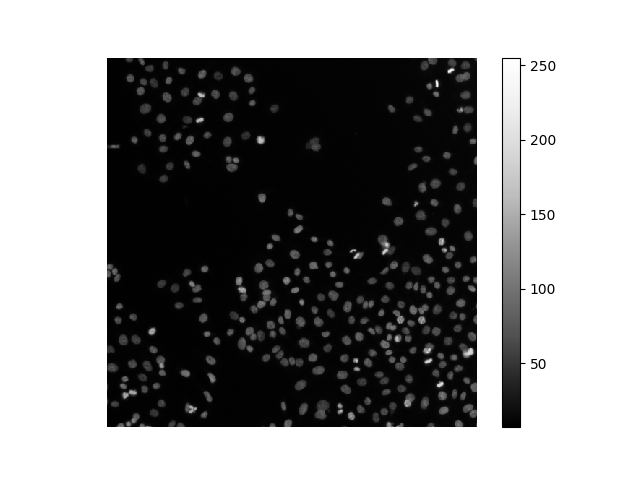
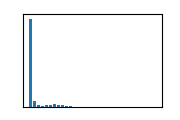

In [2]:
import stackview

# Display the image
stackview.insight(image)

## Segment the nuclei using Voronoi-Otsu-Labeling algorithm

We'll use the `napari-segment-blobs-and-things-with-membranes` plugin to perform segmentation.

In [3]:
import napari_segment_blobs_and_things_with_membranes as nsbatwm

# Segment the nuclei
label_image = nsbatwm.voronoi_otsu_labeling(image, spot_sigma=3.5, outline_sigma=1)

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/napari_tools_menu/__init__.py:10: UserWarning: Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.
  warnings.warn("Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.")
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/napari_tools_menu/__init__.py:221: UserWarning: Error in monkey patching napari. Please let @haesleinleinhuepf know at
https://github.com/haesleinhuepf/napari-tools-menu/issues
  warnings.warn("Error in monkey patching napari. Please let @haesleinleinhuepf know at\nhttps://github.com/haesleinhuepf/napari-tools-menu/issues")


## Convert label image to RGB

We will convert the segmented label image to an RGB image for better visualization.

In [4]:
from skimage import color

# Convert to RGB
rgb_image = color.label2rgb(label_image, bg_label=0)

## Save the RGB image

Finally, we will save the resulting RGB image as a PNG file.

In [5]:
from skimage.io import imsave
import numpy as np

# Save the RGB image
imsave('../data/human_mitosis_segmented.png', np.uint8(255 * rgb_image))